# Algoritmos Genéticos
> O algoritmo completo se encontra no final do notebook, várias funções são criados no caminho.

### Gabriel Negreiros Lima

1. Implementar um algoritmo genético para resolver o problema de maximização da função Alpine 2

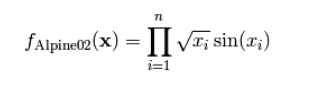

Nesta equação, n representa o número de dimensões e x_i pertencente a [0,10] para i = 1, ..., n. 

## Representação
Neste trabalho teremos n = 2, portanto:

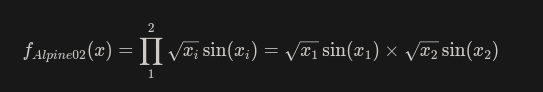

O Máximo Global da função é igual a `f(x^*)=2.808^n => f(x1,x2)=7.88`.

## Função *fitness*
A função de aptidão utilizada será `f_fit(x) = f(x) + 7.88`, que em módulo é o máximo e mínimo desta função, e desta forma não teremos resultados negativos na função *fitness*. Neste trabalho avaliaremos com 3 casas decimais.

In [1]:
import math
from random import randint
import numpy as np

def f_alpine02(x, y):
    return math.sqrt(x)*math.sin(x) * math.sqrt(y)*math.sin(y)+10

def f_fit(x, y):
    return f_alpine02(x, y)

#MAX_ALPINE = f_fit(7.917, 7.917) # 7.88 * 2
#MAX_ALPINE

## População inicial

In [2]:
def pop_inic(size_pop): 
    
    

    x_s = [np.random.uniform(0,10) for _ in range(0,size_pop)]
    y_s = [np.random.uniform(0,10) for _ in range(0,size_pop)]
    population = np.zeros((size_pop,2))

    for index, element in enumerate(x_s):
        x_s[index] = round(x_s[index], 3)
        y_s[index] = round(y_s[index], 3)
        fit = f_fit(x_s[index], y_s[index])
    
        population[index][0] = x_s[index]
        population[index][1] = y_s[index]
    
    return population



## Seleção: roleta
Para fazer a seleção da roleta, iremos utilizar a função `f_fit` para gerar a roleta:

In [3]:

def roleta(population_rol, size_pop):
    sum_fitness = 0
    sum_by_individual = []
    temp = np.array([])                       # temporary to save the fitness
    #number_of_rows, _ = population_rol.shape      # population size
    fitnesses = np.zeros((size_pop,2))  # matrix with position and fitness of each one
    position = 0
    
    #print(population_rol)
    
    # saves all fitnesses and position of the individual
    for i in population_rol:
        temp = f_fit(i[0],i[1]) 
        #print("temp, i[0] i[1]", temp, i[0],i[1])
        fitnesses[position][0] = position
        fitnesses[position][1] = temp
        position += 1
    #print(fitnesses.shape)    
    for fit in fitnesses:
        sum_fitness += fit[1]  
        #print(fit)
        sum_by_individual.append([
            fit[0],
            sum_fitness
        ])
        #print(fit[1], sum_fitness)
         
    sum_fitness = int(sum_fitness * 1000)  # make it a integer to ease
    rand_value = randint(0, sum_fitness)   # randomizing
    
    #print(sum_by_individual)
    rand_value = float(rand_value / 1000)   # make it back to float
    sum_fitness = float(sum_fitness / 1000)
    #print("rand_value_roleta", rand_value)
    
    # find the first element that has fitness sum greater than random
    #print(f"sum_fitness_total: {sum_fitness}")
    #print(f"rand_value: {rand_value}")
    for ind_with_sum  in sum_by_individual:
        #print(ind_with_sum)
        if ind_with_sum[1] > rand_value: 
            #print(f"index of the individual and fitness sum: {ind_with_sum}")
            #print(f"individual: {population[int(ind_with_sum[0])]}")
            print(int(ind_with_sum[0]))
            return population_rol[int(ind_with_sum[0])]
        
        
#roleta(population_rol)

Agora que temos a função roleta, podemos selecionar os pais da próxima geração. Para uma população definida na variável NUMBER_OF_INDIVIDUALS, elegemos a metade de casais que serão os pais, e então estes serão passados para o cruzamento.

## Operadores Genéticos
### Crossover aritmético
Dados dois indivíduos, constituiremos um novo par de indivíduos

In [4]:
def crossover(parent_a, parent_b):
    
  #  a_x = -1
  #  a_y = -1
  #  b_x = -1
  #  b_y = -1
    
   # while a_x < 0 or a_y < 0 or b_x < 0 or b_y < 0 or a_x > 10.0 or a_y > 10.0 or b_x > 10.0 or b_y > 10.0:
    alpha = randint(0,100)/100
    print("alpha", alpha)
    Pa_x = parent_a[0]
    Pa_y = parent_a[1]
    Pb_x = parent_b[0]
    Pb_y = parent_b[1]
        
    a_x = (alpha * Pa_x + (1 - alpha)* Pb_x)
    a_y = (alpha * Pa_y + (1 - alpha)* Pb_y)

    b_x = (alpha * Pb_x + (1 - alpha)* Pa_x)
    b_y = (alpha * Pb_y + (1 - alpha)* Pa_y)
    
    children_a = [a_x, a_y]
    children_b = [b_x, b_y]
    
    return (children_a, children_b)

#children_a, children_b = crossover(population[0], population[1])
#print(children_a, children_b)

### Mutação Gaussiana
Dado um indivíduo, realizar uma mudança local com um ajuste aleatório em ambas as posições:

In [5]:
#
#
#
#  TROCAR: a mutação é feita em todos os genes da população
#  
#
#
#

from random import *

def mutation(individual): 
    max_range_value = 2
    
    signal = randint(0, 3)  # 0 = + + | 1 = + - | 2 = - + | 3 = - - 
    delta_x = randint(0, max_range_value*1000)/1000 # same logic from roleta
    delta_y = randint(0, max_range_value*1000)/1000 
    
    probability = 0.1   # 0.5% 
    #decisor = randint(1, 1000)
    decisor = random()
    
    if decisor <= probability:
        
        # signal choise
        if signal == 0:
            new_x = individual[0]+delta_x
            new_y = individual[1]+delta_y
        elif signal == 1:
            new_x = individual[0]+delta_x
            new_y = individual[1]-delta_y
        elif signal == 2:
            new_x = individual[0]-delta_x
            new_y = individual[1]+delta_y
        elif signal == 3:
            new_x = individual[0]-delta_x
            new_y = individual[1]-delta_y
        
        # boundaries
        if new_x > 10.0:
            new_x = 10.0
        elif new_x < 0:
            new_x = 0
        
        if new_y > 10.0:
            new_y = 10.0
        elif new_y < 0:
            new_y = 0
            
        return [round(new_x, 3), round(new_y, 3)]
    
    return individual

#mutated = mutation(population[4])
#print(population[4], mutated)

## Mais algumas funções auxiliares
### Fitnesses para plots
Dada uma população, precisaremos do maior fitness, do menor, e do fitness médio para criar o gráfico de convergência.

In [6]:
def max_fitness(population_max):
    biggest = 0
    
    for individual in population_max:
        fit = f_fit(individual[0], individual[1])
        
        if fit >= biggest: 
            chosen_x = individual[0]
            chosen_y = individual[1]
            biggest = fit 
    
    return ([chosen_x, chosen_y], biggest)

#max_fitness(population)

In [7]:
def mean_fitness(population_mean,  NUMBER_OF_INDIVIDUALS):
    sum_value = 0.0
    
    for individual in population_mean:
        fit = f_fit(individual[0], individual[1])
        #print("fit",fit)
        sum_value = sum_value + fit 
        #print(sum_value)
        
    return sum_value / NUMBER_OF_INDIVIDUALS
    
#mean_fitness(population)

In [8]:
def min_fitness(population_min):
    minor = 20.0
    
    for individual in population_min:
        fit = f_fit(individual[0], individual[1])
        
        if fit <= minor:
            chosen_x = individual[0]
            chosen_y = individual[1]
            minor = fit 
            
    return ([chosen_x, chosen_y], minor)

#min_fitness(population)

## Algoritmo completo
Agora com as funções necessárias, montamos o algoritmo.

In [9]:
from matplotlib import pyplot as plt
import copy

max_gens = 10
size_pop = 100
actual_gen = 0 
difference = 10000
new_gen= np.zeros((size_pop,2))
vector_best = []
vector_mean = []
vector_worst = []
vector_gen = []
crossover_ratio = 0.5
NUMBER_OF_PARENTS = int(size_pop/2)


current_pop=pop_inic(size_pop)
print(current_pop)

while actual_gen <= max_gens and difference > 0.001:
    
    # Choose the best individual
    best_ind, best_fit = max_fitness(current_pop)
    vector_best.append(best_fit)
    
    mean_fit = mean_fitness(current_pop, size_pop)
    vector_mean.append(mean_fit)
    
    worst_ind, worst_fit = min_fitness(current_pop)
    vector_worst.append(worst_fit)
    
    vector_gen.append(actual_gen) 
    counter = 0 
    
    for index in range(0, size_pop, 2):
        # selection
        parent_a = roleta(current_pop, size_pop)
        parent_b = roleta(current_pop, size_pop)
        #print("Pais", parent_a, parent_b, "\n-----")
        
        cross_rand = randint(0,100)/100
        print(cross_rand)
        if cross_rand <= crossover_ratio:
            # crossover
            children_a, children_b = crossover(parent_a, parent_b)
        
            #print(parent_a, parent_b, "\n")
            #print(children_a, children_b, "\n")
            
     

            # mutation (0.1%)
            children_a = mutation(children_a)
            children_b = mutation(children_b)

            new_gen[index] = children_a
            new_gen[index+1] = children_b

            #print(f"C_a: {children_a}, C_a: {children_b}")
        else:
            new_gen[index] = parent_a
            new_gen[index+1] = parent_b
    
    #print(new_gen, "\n\n\n\n\n")
    #input('Press enter to continue: ')
    current_pop = copy.deepcopy(new_gen)
    #print(current_pop,"\n\n")
    
    difference = abs(best_fit - f_fit(7.917, 7.917))
    #print(f"melhor individuo: {best_ind}, fitness: {best_fit},\nfitness otimo: {f_fit(7.917, 7.917)}, geracao atual: {actual_gen}\n\n")
    actual_gen = actual_gen + 1

    


[[4.067 2.654]
 [2.664 7.42 ]
 [4.956 4.783]
 [3.133 0.265]
 [5.551 2.352]
 [8.452 2.837]
 [7.508 3.165]
 [6.423 9.851]
 [8.363 6.043]
 [1.319 3.375]
 [6.333 5.234]
 [0.094 3.793]
 [7.797 2.861]
 [9.83  9.324]
 [2.434 6.185]
 [0.189 4.939]
 [8.896 1.004]
 [7.814 4.283]
 [0.838 9.651]
 [8.411 7.426]
 [1.654 1.765]
 [8.972 8.914]
 [5.961 9.563]
 [4.066 0.811]
 [2.148 8.772]
 [8.5   0.052]
 [8.279 4.48 ]
 [4.413 0.93 ]
 [2.471 6.643]
 [0.759 5.449]
 [3.675 2.153]
 [4.502 0.07 ]
 [9.219 1.259]
 [4.727 1.17 ]
 [1.482 2.633]
 [5.06  3.884]
 [4.284 8.978]
 [8.289 7.662]
 [4.135 8.298]
 [2.617 2.684]
 [4.009 0.728]
 [4.912 6.18 ]
 [1.577 9.436]
 [6.339 9.512]
 [9.547 6.777]
 [2.507 0.291]
 [4.714 8.39 ]
 [6.721 0.667]
 [7.588 6.505]
 [7.204 1.787]
 [2.944 3.8  ]
 [9.651 4.983]
 [7.656 5.594]
 [1.42  4.93 ]
 [0.848 4.347]
 [8.497 0.026]
 [7.14  4.125]
 [5.921 1.868]
 [7.022 1.719]
 [5.534 0.531]
 [8.522 7.121]
 [7.513 3.547]
 [1.186 8.426]
 [0.844 6.116]
 [5.836 0.685]
 [5.561 7.494]
 [6.666 4.

11
0.64
45
63
0.23
alpha 0.25
62
73
0.03
alpha 0.03
22
83
0.16
alpha 0.39
25
66
0.22
alpha 0.44
48
36
0.48
alpha 0.0
16
18
0.23
alpha 0.74
11
97
0.44
alpha 0.62
86
2
0.49
alpha 0.29
98
36
0.09
alpha 0.72
73
86
0.57
84
30
0.61
21
82
0.5
alpha 0.47
8
99
0.06
alpha 0.03
81
28
0.02
alpha 0.37
52
19
0.11
alpha 0.03
67
61
0.67
29
5
0.94
94
26
0.26
alpha 0.61
80
33
0.63
10
56
0.69
69
79
0.61
49
88
0.62
90
98
0.58
54
98
0.61
28
45
0.83
98
66
0.89
79
68
0.27
alpha 0.4
87
72
0.08
alpha 0.4
67
6
0.4
alpha 0.85
50
50
0.59
71
49
0.21
alpha 0.88
30
45
0.07
alpha 0.78
25
26
0.8
12
81
0.32
alpha 0.42
8
53
0.54
15
40
0.68
89
11
0.07
alpha 0.73
63
60
0.38
alpha 0.41
63
71
1.0
55
31
0.64
97
7
0.71
92
77
0.36
alpha 0.87
67
67
0.35
alpha 0.2
16
20
0.47
alpha 0.9
94
26
0.62
93
61
0.17
alpha 0.21
17
78
0.59
46
57
0.45
alpha 0.25
88
16
1.0
84
85
0.58
89
26
1.0
71
83
0.64
59
89
0.98
78
70
0.25
alpha 0.81
73
54
0.63
11
14
0.07
alpha 0.39
29
61
0.45
alpha 0.78
32
7
0.84
61
35
0.9
31
56
0.98
77
29
0.94
17
9
0.77


# ToDo
- Plotar gráfico de convergência
  - Fitness do melhor
  - Fitness médio da população
  - Fitness do pior elemento

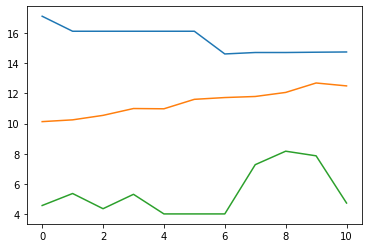

In [10]:
plt.plot(vector_gen, vector_best, label='best')
plt.plot(vector_gen, vector_mean, label='mean')
plt.plot(vector_gen, vector_worst, label='worst')
#plt.xlabel("Generations")
#plt.ylabel("Fitness")
plt.show()